#Imports

In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
## for text processing
import re
import nltk
from nltk.tokenize import word_tokenize
# for sentiment
from textblob import TextBlob
## for ner
import spacy
import spacy.cli
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
from gensim.models import Word2Vec, KeyedVectors
# Downloads
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
spacy.cli.download("en_core_web_lg")
!pip install --upgrade gensim
!pip install wordcloud
!wget -P /root/input -c

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=8ba193bced4911cefd1dde30778e2c0bec61fdb209fbf6ac024ad6823a62ee77
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=3b18c0d0708b482eaa64650f6a6b7f8b250b307abef7189abca5dfb56a164103
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Att

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure
from wordcloud import WordCloud

In [ ]:
news = pd.read_csv("News.csv")



#Text Preprocessing

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def preprocess(text, lst_stopwords=lst_stopwords):

    ## get rid of author/site credits
    if ("@" in text):
      counts = text.count('@')
      for x in range(0, counts):
        start_index = text.find("@")
        end_index = text.find(" ", start_index);
        at_index = text.find("@", start_index+1)
        if (at_index < end_index != -1 and at_index != -1) or (end_index == -1 and at_index > end_index):
          end_index = at_index-1
        if (end_index == -1):
          text = text[0: start_index]
        else:
          temp = text
          temp = temp[start_index: end_index+1]
          text = text.replace(temp, "", 1)
    if ('http' in text):
      counts = text.count('http')
      for x in range(0, counts):
        start_index = text.index("http")
        end_index = text.find(" ", start_index)
        if (end_index == -1):
          text = text[0: start_index]
        else:
          temp = text
          temp = temp[start_index: end_index+1]
          text = text.replace(temp, "")
    if ('pic' in text):
      start_index = text.index("pic")
      end_index = text.find(" ", start_index)
      if (end_index == -1):
        text = text[0: start_index]
      else:
        temp = text
        temp = temp[start_index: end_index+1]
        text = text.replace(temp, "")

    ## remove hashtags
    if ("#" in text):
      counts = text.count('#')
      for x in range(0, counts):
        start_index = text.find("#")
        end_index = text.find(" ", start_index)
        hash_index = text.find("#", start_index+1)
        if (hash_index < end_index != -1 and hash_index != -1) or (end_index == -1 and hash_index > end_index):
          end_index = hash_index-1
        if (end_index == -1):
          text = text[0: start_index]
        else:
          temp = text
          temp = temp[start_index: end_index+1]
          text = text.replace(temp, "", 1)

    ## remove numbers, punctuation, and special charcters
    text = re.sub('[^A-Za-z_ ]+', '', text)

    ## removes double spaces, tabs, whitespace, etc.
    text = " ".join(text.split())

    ## clean (convert to lowercase and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    ## Lemmatisation (convert the word into root word)
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
#Preprocess each Tweet and add them to new preprocessed dataframe
news_dict = news.to_dict('records')
for row in news_dict:
  processed_string = preprocess(row['Text'])
  row['Text'] = processed_string

processed_news = pd.DataFrame.from_dict(news_dict)
processed_news

In [ ]:
processed_news.loc[processed_news['Label'] == 0]

In [ ]:
# Remove tweets that have become empty after preprocessing
processed_news.drop([1121, 4747, 4885, 5830, 5831, 6418, 6419, 6592], axis = 0, inplace = True)

In [ ]:
#Split dataset into train and test datsets
X_train, X_test, Y_train, Y_test = train_test_split(processed_news['Text'], processed_news['Label'], test_size = 0.2)

In [ ]:
lis = []
pnews_dict = news.to_dict('records')
for row in pnews_dict:
  if "@" in row['Text'] or "#" in row['Text']:
    lis.append(row['Text'])
processed_news

# Feature Engineering

In [ ]:
def plot_features(feature_df, heading, label_name = "Label", data_df = processed_news):
  fig, ax = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(heading, fontsize=32)
  for i in data_df[label_name].unique():
      sns.distplot(feature_df[data_df[label_name]==i][heading], hist=True, kde=False,
                  bins=10, hist_kws={"alpha":0.8},
                  axlabel="histogram", ax=ax[0])

      sns.distplot(feature_df[data_df[label_name]==i][heading], hist=False, kde=True,
                  kde_kws={"shade":True}, axlabel="density",
                  ax=ax[1])
      sns.set(rc={'figure.figsize':(37,8.27)})

  ax[0].grid(True)
  ax[0].legend(data_df[label_name].unique())
  ax[1].grid(True)
  plt.show()

### Length Features

In [ ]:
length_features = pd.DataFrame()
length_features['word_count'] = processed_news['Text'].apply(lambda x: len(str(x).split(" ")))
length_features['char_count'] = processed_news['Text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
length_features['avg_word_length'] = length_features['char_count'] / length_features['word_count']
length_features

,word_count,char_count,avg_word_length
0,5,30,6.000000
1,6,41,6.833333
2,9,54,6.000000
3,7,51,7.285714
4,16,104,6.500000
...,...,...,...
7583,6,50,8.333333
7584,6,32,5.333333
7585,6,36,6.000000
7586,8,47,5.875000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

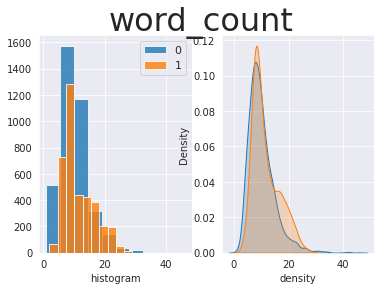

In [ ]:
plot_features(length_features, "word_count")

### Sentiment Features

In [ ]:
sentiment_features = pd.DataFrame()
sentiment_features["sentiment"] = processed_news['Text'].apply(lambda x:
                   TextBlob(x).sentiment.polarity)
sentiment_features

,sentiment
0,0.200000
1,0.000000
2,0.000000
3,0.250000
4,0.000000
...,...
7583,0.000000
7584,0.400000
7585,0.000000
7586,0.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

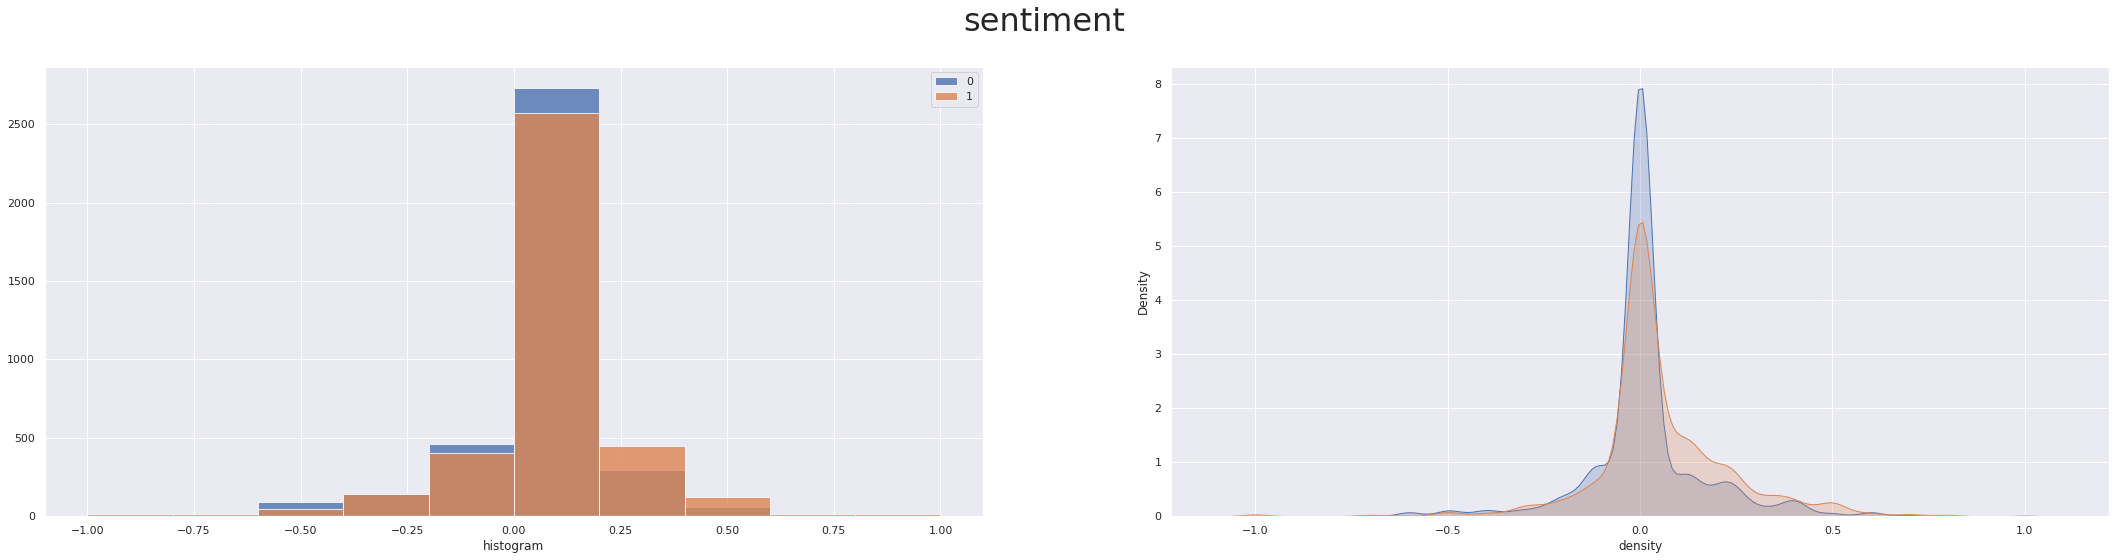

In [ ]:
plot_features(sentiment_features, "sentiment")

### Named-Entity Recognition Features

In [ ]:
## call model
ner = spacy.load("en_core_web_lg")

In [ ]:
import collections
ner_features = pd.DataFrame()
## tag text and exctract tags into a list
ner_features["tags"] = processed_news['Text'].apply(lambda x: [(tag.text, tag.label_)
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict(
                     sorted(dic_counter.items(),
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
ner_features["tags"] = ner_features["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in ner_features["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     ner_features["tags_"+feature] = ner_features["tags"].apply(lambda x:
                             utils_ner_features(x, feature))

## print result
ner_features.head()

,tags,tags_EVENT,tags_LANGUAGE,tags_LOC,tags_MONEY,tags_TIME,tags_PERCENT,tags_GPE,tags_DATE,tags_NORP,tags_PERSON,tags_FAC,tags_ORDINAL,tags_LAW,tags_QUANTITY,tags_WORK_OF_ART,tags_PRODUCT,tags_CARDINAL,tags_ORG
0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"[{('florida', 'GPE'): 1}]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,"[{('simpson', 'PERSON'): 1}]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,"[{('chinese', 'NORP'): 1}, {('xi jinping', 'PE...",0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

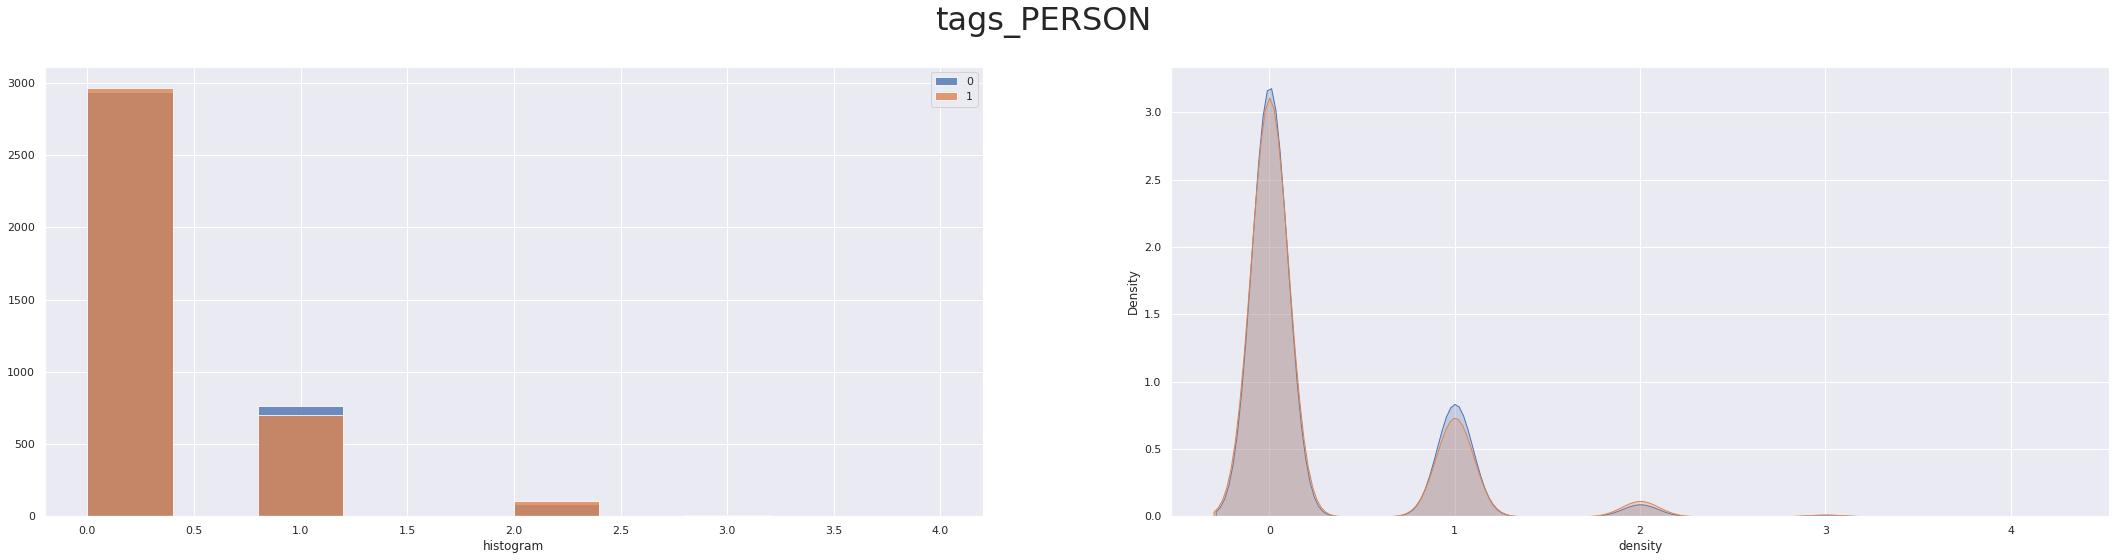

In [ ]:
plot_features(ner_features, "tags_PERSON")

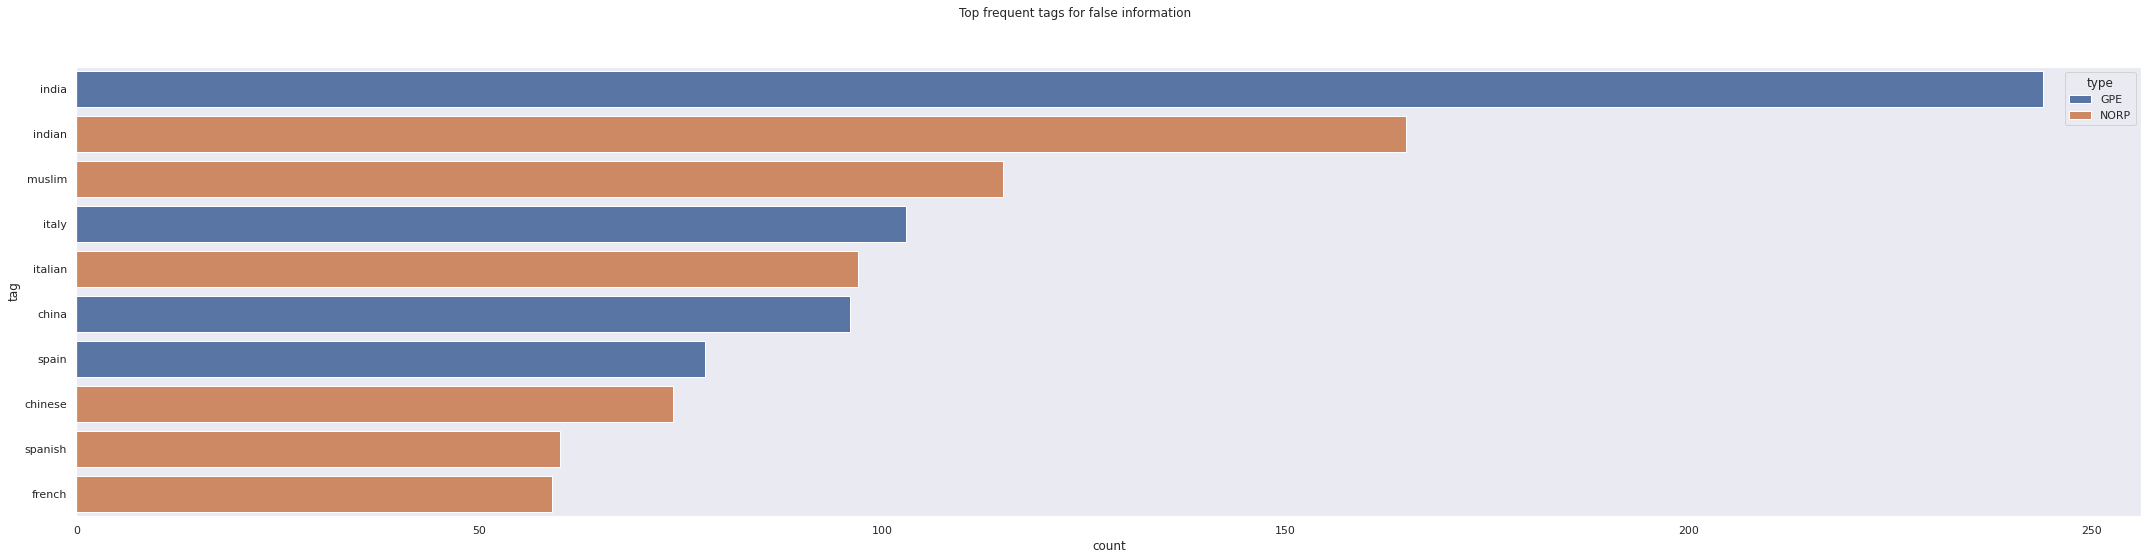

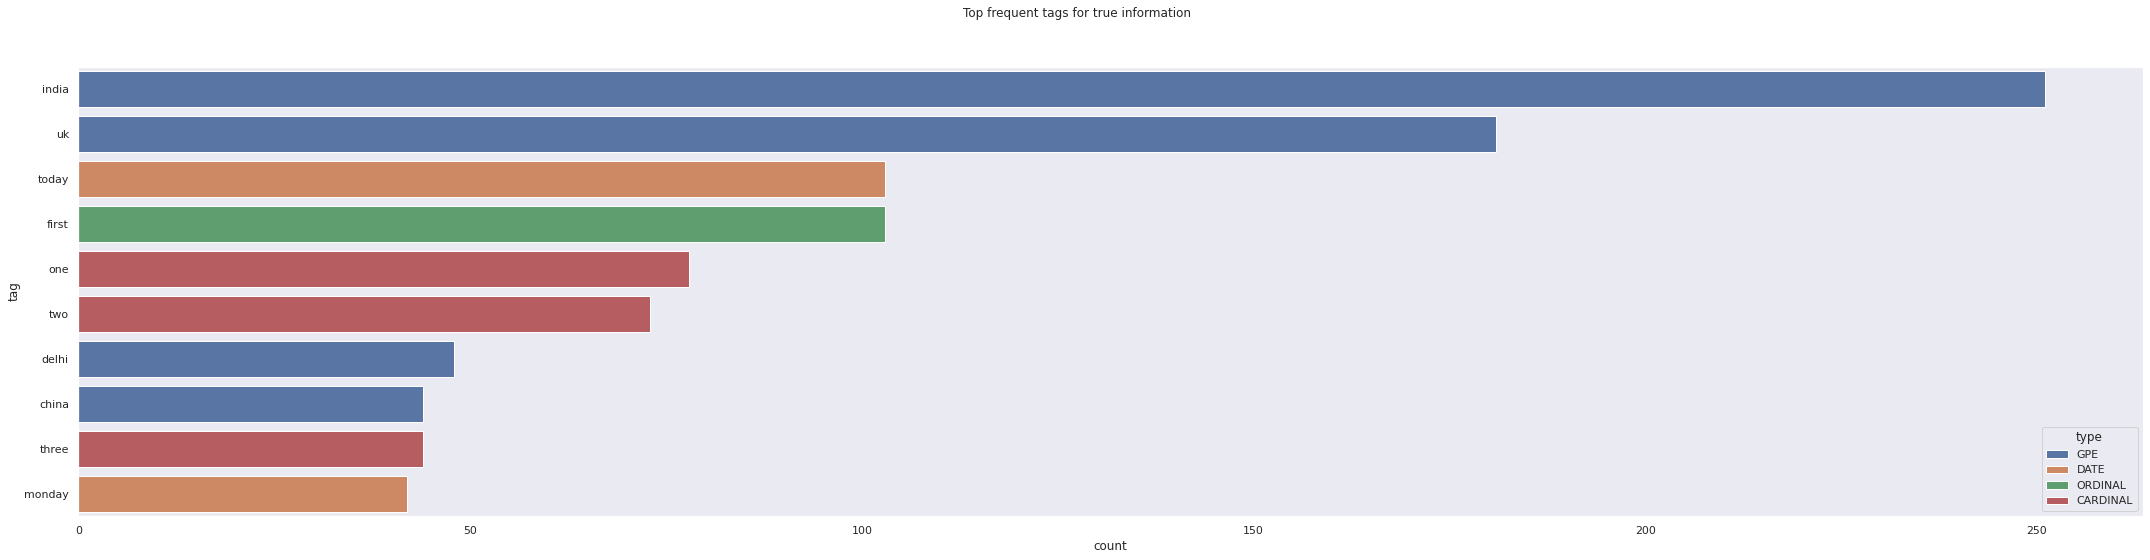

In [ ]:
for label in processed_news['Label'].unique():
  tags_list = ner_features[processed_news['Label']==label]["tags"].sum()
  map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
  dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
  dtf_tags["count"] = 1
  dtf_tags = dtf_tags.groupby(['type',
                  'tag']).count().reset_index().sort_values("count",
                  ascending=False)
  fig, ax = plt.subplots()
  validity = "false" if label == 0 else "true"
  fig.suptitle("Top frequent tags for " + validity + " information", fontsize=12)
  sns.barplot(x="count", y="tag", hue="type",
              data=dtf_tags.iloc[:10,:], dodge=False, ax=ax)
  ax.grid(axis="x")
  plt.show()

### N-Grams

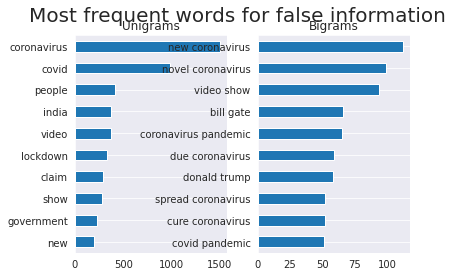

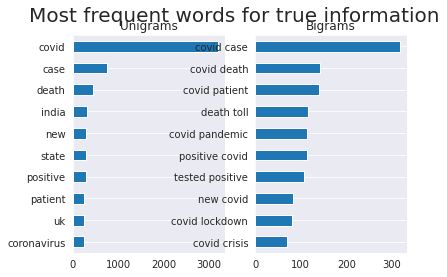

In [ ]:
for label in processed_news['Label'].unique():
  corpus = processed_news[processed_news['Label']==label]['Text']
  lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
  fig, ax = plt.subplots(nrows=1, ncols=2)
  validity = "false" if label == 0 else "true"
  fig.suptitle("Most frequent words for " + validity + " information", fontsize=20)

  ## unigrams
  dic_words_freq = nltk.FreqDist(lst_tokens)
  dtf_uni = pd.DataFrame(dic_words_freq.most_common(),
                        columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0],
                    legend=False).grid(axis='x')
  ax[0].set(ylabel=None)

  ## bigrams
  dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
  dtf_bi = pd.DataFrame(dic_words_freq.most_common(),
                        columns=["Word","Freq"])
  dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
  dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
  ax[1].set(ylabel=None)
  plt.show()

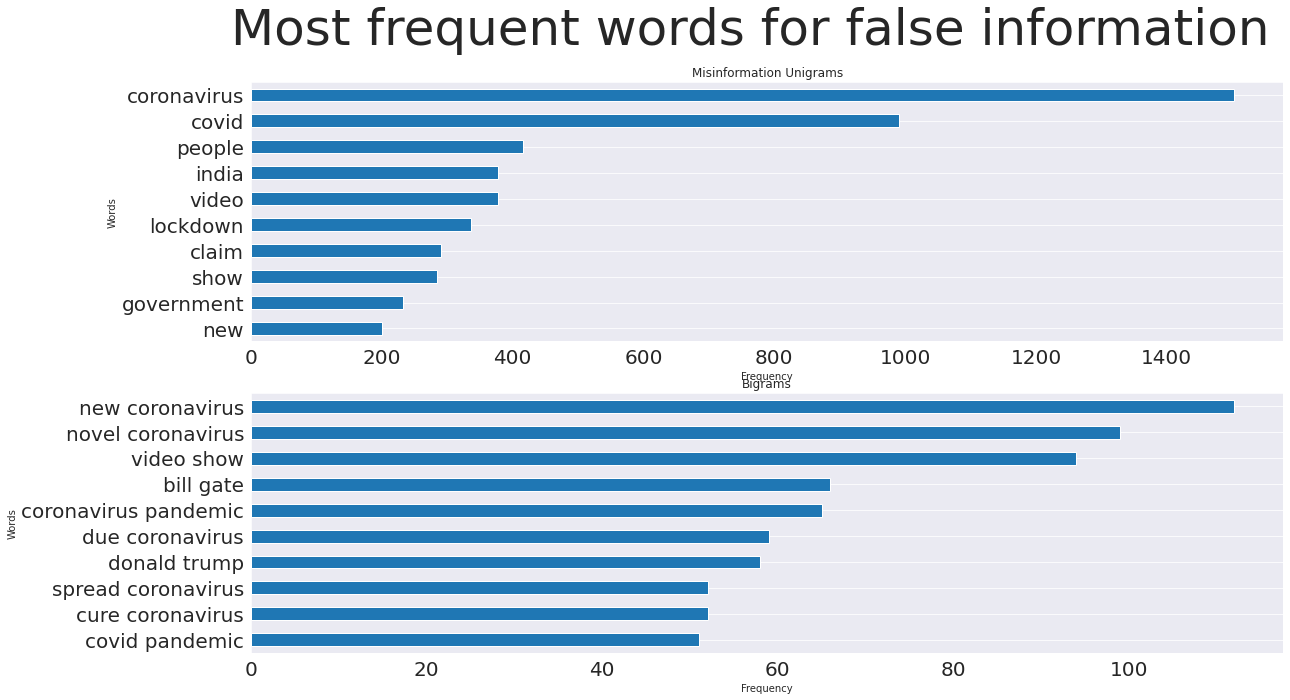

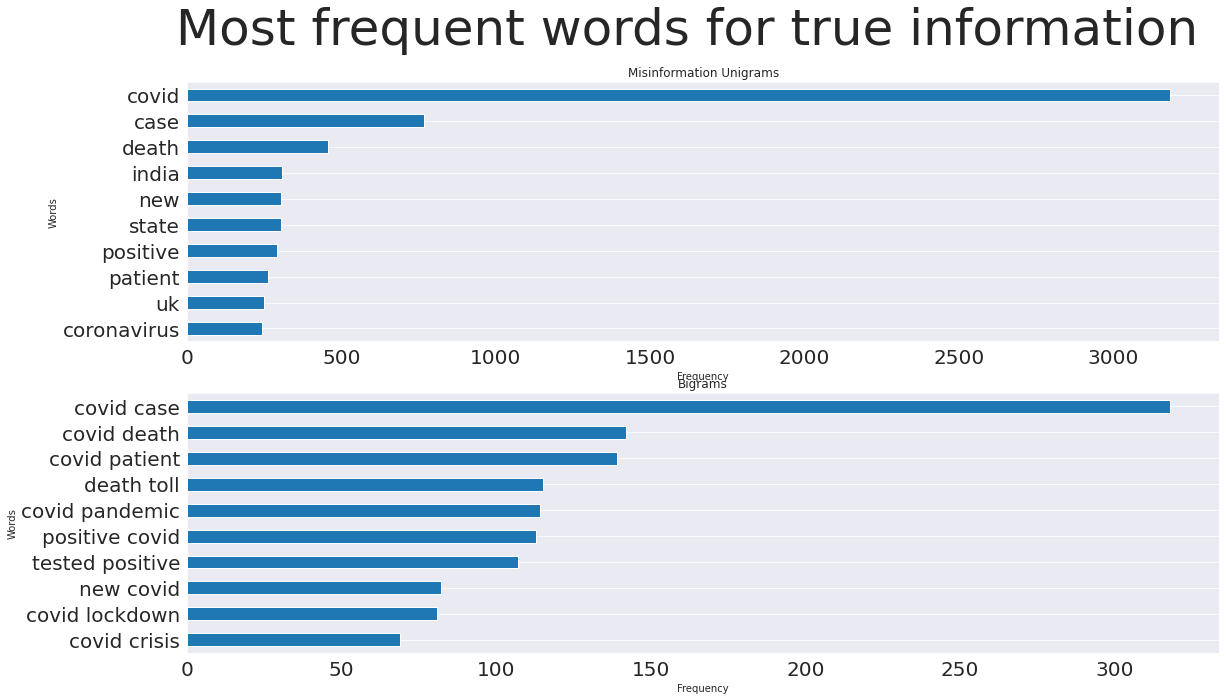

In [ ]:
for label in processed_news['Label'].unique():
  corpus = processed_news[processed_news['Label']==label]['Text']
  lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
  fig, ax = plt.subplots(nrows=2, ncols=1)
  validity = "false" if label == 0 else "true"
  fig.suptitle("Most frequent words for " + validity + " information", fontsize=50)
  fig.set_size_inches(18.5, 10.5)

  ## unigrams
  dic_words_freq = nltk.FreqDist(lst_tokens)
  dtf_uni = pd.DataFrame(dic_words_freq.most_common(),
                        columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Misinformation Unigrams", ax=ax[0],
                    legend=False, fontsize = 20).grid(axis='x')
  ax[0].set(ylabel="Words", xlabel="Frequency")

  ## bigrams
  dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
  dtf_bi = pd.DataFrame(dic_words_freq.most_common(),
                        columns=["Word","Freq"])
  dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
  dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False, fontsize = 20).grid(axis='x')
  ax[1].set(ylabel="Words", xlabel="Frequency")
  plt.show()

In [ ]:
ngram_features = pd.DataFrame()
lst_words = ["donald trump", "covid death"]
## count
lst_grams = [len(word.split(" ")) for word in lst_words]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_words,
                 ngram_range=(min(lst_grams),max(lst_grams)))
dtf_X = pd.DataFrame(vectorizer.fit_transform(processed_news['Text']).todense(), columns=lst_words)
## add the new features as columns
ngram_features = pd.concat([ngram_features, dtf_X.set_index(processed_news.index)], axis=1)
print(ngram_features.loc[ngram_features['donald trump'] > 0])
print("\n")
print(ngram_features.loc[ngram_features['covid death'] > 0])

      donald trump  covid death
34               1            0
124              1            0
257              1            0
300              1            0
487              1            0
...            ...          ...
5897             1            0
5982             1            0
6337             1            0
6340             1            0
6775             1            0

[71 rows x 2 columns]


      donald trump  covid death
1036             0            1
1543             0            1
1631             0            1
1712             0            1
1863             0            1
...            ...          ...
7392             0            1
7418             0            1
7458             0            1
7465             0            1
7485             0            1

[153 rows x 2 columns]


In [ ]:
news['Text'][34], news['Text'][7485]

(' The coronavirus epidemic will disappear in April thanks to the heat, as President Donald Trump said.\t\t',
 'UK COVID-19 death toll rises to 43,414, up 186  https://uk.reuters.com/article/uk-health-coronavirus-britain-casualties-idUKKBN23X23E?taid=5ef6297b89f423000106360a&utm_campaign=trueAnthem%3A+Trending+Content&utm_medium=trueAnthem&utm_source=twitter\xa0 pic.twitter.com/LviHxHUduM')

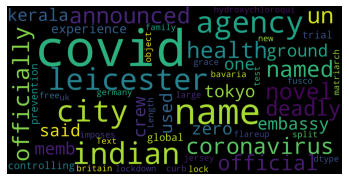

In [ ]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100,
                         max_font_size=750, width=5000, height=2500)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

## Word2Vec

In [ ]:
import gensim
# model = gensim.models.Word2Vec.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True) #word2vec-google-news-300
print(path)

ModuleNotFoundError: No module named 'gensim'

In [ ]:
w2v_model = KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
def embedding_feats(list_of_lists):
  DIMENSION = 300
  zero_vector = np.zeros(DIMENSION)
  feats = []
  for tokens in list_of_lists:
    feat_for_this = np.zeros(DIMENSION)
    count_for_this = 0
    for token in tokens:
      if token in w2v_model:
        feat_for_this += w2v_model[token]
        count_for_this +=1
    feats.append(feat_for_this/count_for_this)
  return feats

train_vectors = embedding_feats(X_train)
test_vectors = embedding_feats(X_test)

print(len(train_vectors))

In [ ]:
index = 0
vect_index = []
num_index = []
for vecs in train_vectors:
  ind = 0
  temp = []
  if not(not(np.any(np.isnan(vecs))) or np.all(np.isfinite(vecs))):
    vect_index.append(index)
    for nums in vecs:
      if not nums:
        temp.append(ind)
      ind += 1
    num_index.append(temp)
  index += 1
vect_index, num_index

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.__getitem__([word]), axis=0)

    # gets list of most similar words
    close_words = model.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=15).fit_transform(arrays)

    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for {}'.format(word.title()))

In [ ]:
tsnescatterplot(w2v_model, 'death', [i[0] for i in w2v_model.most_similar(negative=["death"], topn=20)][10:])

##TF-IDF

In [ ]:
train_data_tfidf = []
for line in X_train:
  temp = []
  for word in word_tokenize(line):
    temp.append(word)
  train_data_tfidf.append(temp)

In [ ]:
test_data_tfidf = []
for line in X_test:
  temp = []
  for word in word_tokenize(line):
    temp.append(word)
  test_data_tfidf.append(temp)


NameError: ignored

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform([" ".join(x) for x in train_data_tfidf])
X_test_vectors_tfidf = tfidf_vectorizer.transform([" ".join(x) for x in test_data_tfidf])

In [ ]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())
top_n=100
sorted_nzs = np.argsort(X_train_vectors_tfidf.data)[:-(top_n+1):-1]
feature_names[X_train_vectors_tfidf.indices[sorted_nzs]]

NameError: ignored

In [ ]:
import wordcloud
wcc = wordcloud.WordCloud(background_color='black', max_words=100,
                         max_font_size=750, width=10000, height=5000)
xas = " ".join(feature_names[X_train_vectors_tfidf.indices[sorted_nzs]])
wcc = wcc.generate(xas)
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wcc, cmap=None, interpolation='bilinear')
plt.figure( figsize=(50,20) )
plt.show()

In [ ]:
data = df.transpose()
data.columns = reference.keys()

# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wc = WordCloud(background_color="white",                  # select background color
               width=3000,                                # set wight
               height=2000,                               # set height
               max_words=500)\
            .generate_from_frequencies(data['biden'])     # set max amount of words
                                                          # choose column for wordcloud

wc.recolor(color_func = black_color_func)                 # set the word color to black
plt.figure(figsize=[15,10])                               # set the figsize
plt.imshow(wc, interpolation="bilinear");                 # plot the wordcloud
plt.axis("off")                                           # remove plot axes
plt.savefig('wordcloud.png')

NameError: ignored

# Classification Models

In [ ]:
from IPython.core.pylabtools import figsize
auc_dict_w2v = {}
auc_dict_tfidf = {}
def test_model (model, feature_method, model_name):

  X_tests = test_vectors if feature_method == "Word2Vec" else X_test_vectors_tfidf
  if model_name == "Naive Bayes" and feature_method == "Word2Vec": scaler.fit_transform(X_tests)
  #Predict y value for test dataset
  y_predict = model.predict(X_tests)
  print(classification_report(Y_test, y_predict))

  ## Plot confusion matrix
  cm = confusion_matrix(Y_test, y_predict)
  fig, ax = plt.subplots(figsize=(15, 5))
  classes = np.array(["False", "Fact"])
  print(type(classes))
  sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
              cbar=False, annot_kws={"fontsize":24})
  ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,
        yticklabels=classes, title="Confusion matrix")
  plt.yticks(fontsize = 24, rotation=0)
  plt.xticks(fontsize = 24)
  plt.xlabel("Pred", fontsize = 25)
  plt.ylabel("True", fontsize = 25)
  plt.title("Confusion matrix - " + feature_method + " and " + model_name, fontsize= 26)
  roc_auc = 0.0
  try:
      y_prob = model.predict_proba(X_tests)[:,1]
      fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
      roc_auc = auc(fpr, tpr)
  except:
    roc_auc = model.score(X_tests, Y_test)
  precision = precision_score(Y_test, y_predict)
  recall = recall_score(Y_test, y_predict)
  if (feature_method == "Word2Vec"):
    auc_dict_w2v[model_name] = roc_auc
  else:
    auc_dict_tfidf[model_name] = roc_auc
  print('Precision: {} / Recall: {} / Accuracy: {}'.format(
      round(precision, 3), round(recall, 3), roc_auc))

##Logisitic Regression

### Word2Vec

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v = LogisticRegression()
lr_w2v.fit(train_vectors, Y_train)
test_model(lr_w2v, "Word2Vec", "Logistic Regression")

NameError: ignored

### TF-IDF

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       744
           1       0.90      0.92      0.91       772

    accuracy                           0.91      1516
   macro avg       0.91      0.91      0.91      1516
weighted avg       0.91      0.91      0.91      1516

<class 'numpy.ndarray'>
Precision: 0.903 / Recall: 0.925 / Accuracy: 0.967515599754861


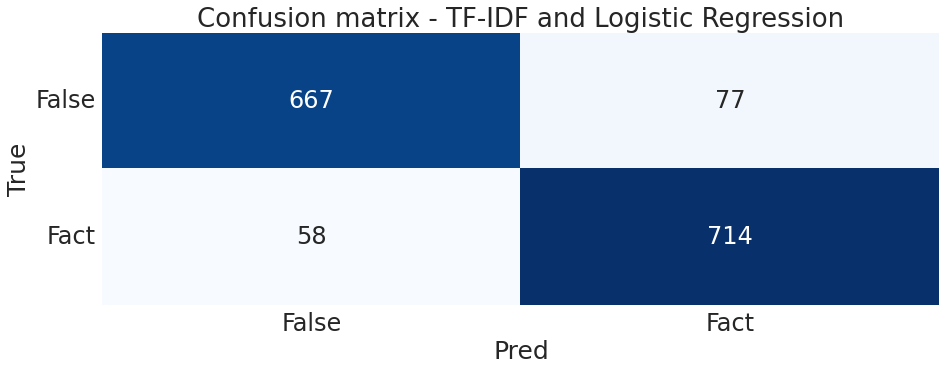

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression
lr_tfidf = LogisticRegression(solver = 'sag', C=50)
lr_tfidf.fit(X_train_vectors_tfidf, Y_train)
test_model(lr_tfidf, "TF-IDF", "Logistic Regression")

##Random Forest

### Word2Vec

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       744
           1       0.74      0.70      0.72       772

    accuracy                           0.72      1516
   macro avg       0.73      0.73      0.72      1516
weighted avg       0.73      0.72      0.72      1516

<class 'numpy.ndarray'>
Precision: 0.742 / Recall: 0.705 / Accuracy: 0.8022260989470166


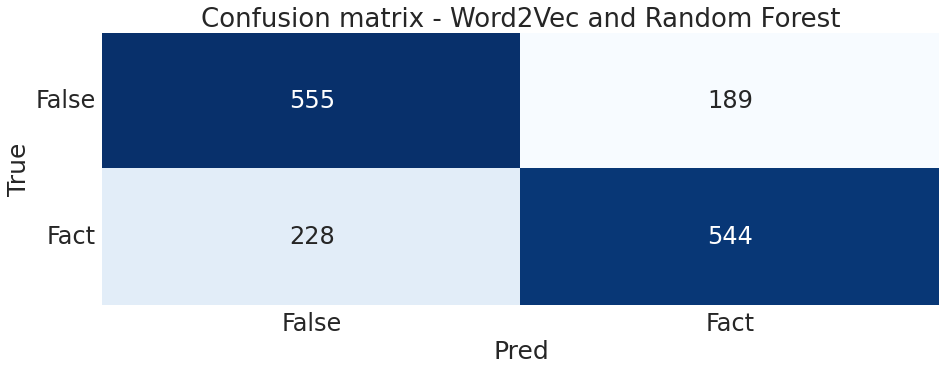

In [ ]:
rf_w2v = RandomForestClassifier()
rf_w2v = rf_w2v.fit(train_vectors, Y_train)
test_model(rf_w2v, "Word2Vec", "Random Forest")

###TF-IDF

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       744
           1       0.89      0.92      0.90       772

    accuracy                           0.90      1516
   macro avg       0.90      0.90      0.90      1516
weighted avg       0.90      0.90      0.90      1516

<class 'numpy.ndarray'>
Precision: 0.89 / Recall: 0.92 / Accuracy: 0.9591725165747396


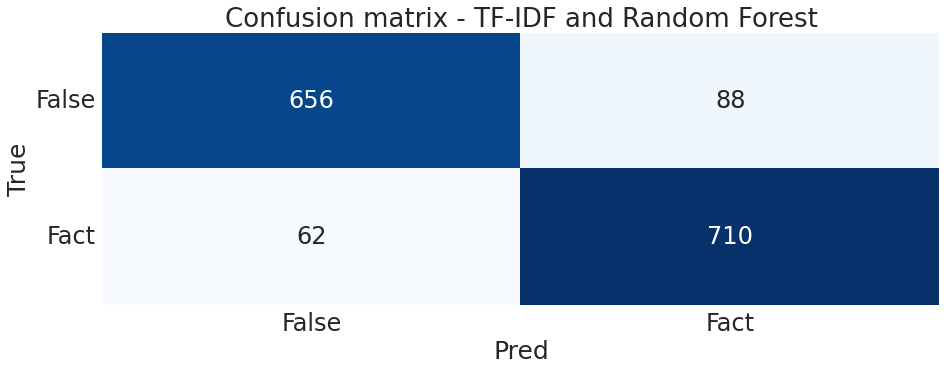

In [ ]:
rf_tfidf = RandomForestClassifier()
rf_tfidf = rf_tfidf.fit(X_train_vectors_tfidf, Y_train)
test_model(rf_tfidf, "TF-IDF", "Random Forest")

##Naive Bayes

### Word2Vec

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       744
           1       0.51      1.00      0.67       772

    accuracy                           0.51      1516
   macro avg       0.25      0.50      0.34      1516
weighted avg       0.26      0.51      0.34      1516

<class 'numpy.ndarray'>
Precision: 0.509 / Recall: 1.0 / Accuracy: 0.7043672349434509


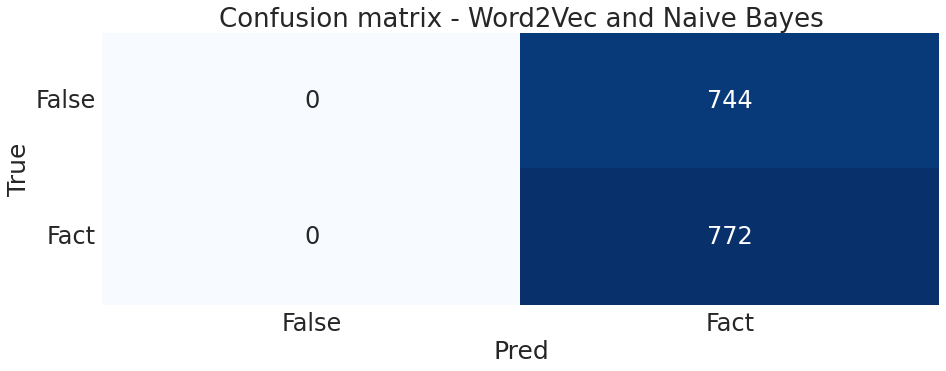

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_w2v = MultinomialNB()
scaler = MinMaxScaler()
nb_w2v.fit(scaler.fit_transform(train_vectors), Y_train)
test_model(nb_w2v, "Word2Vec", "Naive Bayes")

### TF-IDF

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       744
           1       0.89      0.91      0.90       772

    accuracy                           0.90      1516
   macro avg       0.90      0.89      0.90      1516
weighted avg       0.90      0.90      0.90      1516

<class 'numpy.ndarray'>
Precision: 0.89 / Recall: 0.905 / Accuracy: 0.9631978104629785


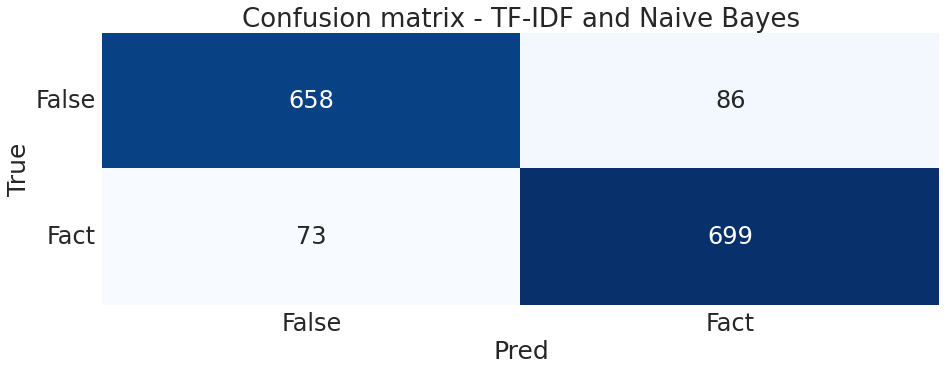

In [ ]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, Y_train)
test_model(nb_tfidf, "TF-IDF", "Naive Bayes")

## Ridge Classifier

### Word2Vec

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       744
           1       0.68      0.64      0.66       772

    accuracy                           0.66      1516
   macro avg       0.66      0.66      0.66      1516
weighted avg       0.67      0.66      0.66      1516

<class 'numpy.ndarray'>
Precision: 0.68 / Recall: 0.642 / Accuracy: 0.6642480211081794


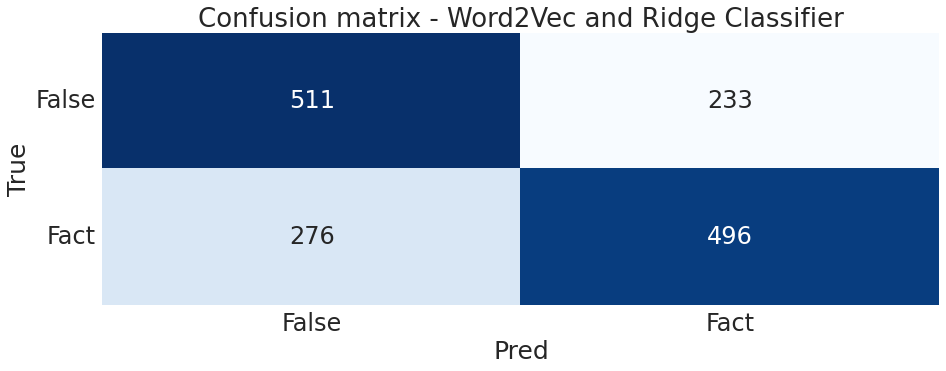

In [ ]:
rc_w2v = RidgeClassifier()
rc_w2v.fit(train_vectors, Y_train)
test_model(rc_w2v, "Word2Vec", "Ridge Classifier")

### TF-IDF

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       744
           1       0.91      0.94      0.92       772

    accuracy                           0.92      1516
   macro avg       0.92      0.92      0.92      1516
weighted avg       0.92      0.92      0.92      1516

<class 'numpy.ndarray'>
Precision: 0.907 / Recall: 0.935 / Accuracy: 0.9182058047493403


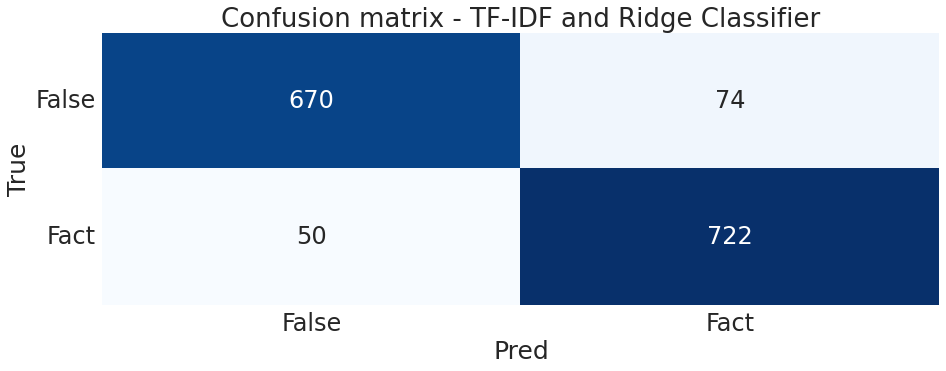

In [ ]:
rc_tfidf = RidgeClassifier()
rc_tfidf.fit(X_train_vectors_tfidf, Y_train)
test_model(rc_tfidf, "TF-IDF", "Ridge Classifier")

In [ ]:
sum(auc_dict_w2v.values()) / len(auc_dict_w2v), sum(auc_dict_tfidf.values()) / len(auc_dict_tfidf)

(0.7236357210829393, 0.9520229328854799)

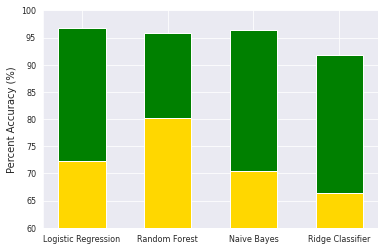

In [ ]:
names = list(auc_dict_w2v.keys())
values_w2v = list(auc_dict_w2v.values())
values_tfidf = list(auc_dict_tfidf.values())
fig, ax = plt.subplots(nrows=1, ncols=1)

plt.bar(range(len(auc_dict_w2v)), [item * 100 for item in values_tfidf], tick_label=names, width = 0.55, color = 'Green')
plt.bar(range(len(auc_dict_w2v)), [item * 100 for item in values_w2v], tick_label=names, width = 0.55, color = 'Gold')
plt.ylabel("Percent Accuracy (%)")
plt.ylim(60, 100)
plt.tick_params(labelsize = 8)
plt.show()

In [ ]:
[]